In [1]:
import trimesh
from plyfile import PlyData, PlyElement, PlyProperty
import numpy as np
import laspy as lp
import pandas as pd

In [2]:
las =lp.read("Davis/davis.las")
las

<LasData(1.2, point fmt: <PointFormat(3, 0 bytes of extra dims)>, 973372 points, 2 vlrs)>

In [3]:
las_data = np.stack([las.X, las.Y, las.Z], axis=0).transpose((1, 0))
las_data

array([[ 60886644, 426675975,      1441],
       [ 60886738, 426675975,      1442],
       [ 60886828, 426675977,      1445],
       ...,
       [ 60903601, 426672322,      2165],
       [ 60899551, 426671701,      1537],
       [ 60900385, 426672500,      2190]], dtype=int32)

In [4]:
las_df = pd.DataFrame(data=las_data, columns=['las_X','las_Y','las_Z'])
las_df

,las_X,las_Y,las_Z
0,60886644,426675975,1441
1,60886738,426675975,1442
2,60886828,426675977,1445
3,60886919,426675977,1446
4,60887006,426675977,1450
...,...,...,...
973367,60902770,426671705,1521
973368,60901218,426670940,1937
973369,60903601,426672322,2165
973370,60899551,426671701,1537


In [5]:
############# !!!!!!! IMPORTANT ###############
## Las data has scale and offset need to apply to the raw data in able to retrace to original geo location
# Xcoordinate = (Xrecord * Xscale) + Xoffset
# Ycoordinate = (Yrecord * Yscale) + Yoffset
# Zcoordinate = (Zrecord * Zscale) + Zoffset 

las_x_scale = las.header.x_scale
las_y_scale = las.header.y_scale
las_z_scale = las.header.z_scale

las_x_offset = las.header.x_offset
las_y_offset = las.header.y_offset
las_z_offset = las.header.z_offset


In [6]:
las_df.las_X = las_df.las_X * las_x_scale + las_x_offset
las_df.las_Y = las_df.las_Y * las_y_scale + las_y_offset
las_df.las_Z = las_df.las_Z * las_z_scale + las_z_offset

las_df

,las_X,las_Y,las_Z
0,608866.44,4266759.75,14.41
1,608867.38,4266759.75,14.42
2,608868.28,4266759.77,14.45
3,608869.19,4266759.77,14.46
4,608870.06,4266759.77,14.50
...,...,...,...
973367,609027.70,4266717.05,15.21
973368,609012.18,4266709.40,19.37
973369,609036.01,4266723.22,21.65
973370,608995.51,4266717.01,15.37


In [7]:
plydata = PlyData.read('Davis/vm2_visual.ply')

In [8]:
plydata.elements

(PlyElement('vertex', (PlyProperty('x', 'float'), PlyProperty('y', 'float'), PlyProperty('z', 'float'), PlyProperty('class', 'float'), PlyProperty('red', 'uchar'), PlyProperty('green', 'uchar'), PlyProperty('blue', 'uchar')), count=973372, comments=[]),)

In [9]:
point_data = np.stack([plydata['vertex']['x'], plydata['vertex']['y'], plydata['vertex']['z'], plydata['vertex']['class']], axis=0).transpose((1, 0))

In [10]:
point_data

array([[382.335, 583.625, 176.965,   1.   ],
       [383.275, 583.625, 176.975,   1.   ],
       [384.175, 583.645, 177.005,   1.   ],
       ...,
       [551.905, 547.095, 184.205,   2.   ],
       [511.405, 540.885, 177.925,   1.   ],
       [519.745, 548.875, 184.455,   8.   ]], dtype=float32)

In [11]:
df = pd.DataFrame(data=point_data, columns=['X','Y','Z','Class'])
df

,X,Y,Z,Class
0,382.334991,583.625000,176.964996,1.0
1,383.274994,583.625000,176.975006,1.0
2,384.174988,583.645020,177.005005,1.0
3,385.084991,583.645020,177.014999,1.0
4,385.954987,583.645020,177.055008,1.0
...,...,...,...,...
973367,543.595032,540.924988,177.764999,1.0
973368,528.075012,533.275024,181.925003,1.0
973369,551.905029,547.094971,184.205002,2.0
973370,511.404999,540.885010,177.925003,1.0


In [12]:
df['las_X'] = las_df['las_X']
df['las_Y'] = las_df['las_Y']
df['las_Z'] = las_df['las_Z']

df

,X,Y,Z,Class,las_X,las_Y,las_Z
0,382.334991,583.625000,176.964996,1.0,608866.44,4266759.75,14.41
1,383.274994,583.625000,176.975006,1.0,608867.38,4266759.75,14.42
2,384.174988,583.645020,177.005005,1.0,608868.28,4266759.77,14.45
3,385.084991,583.645020,177.014999,1.0,608869.19,4266759.77,14.46
4,385.954987,583.645020,177.055008,1.0,608870.06,4266759.77,14.50
...,...,...,...,...,...,...,...
973367,543.595032,540.924988,177.764999,1.0,609027.70,4266717.05,15.21
973368,528.075012,533.275024,181.925003,1.0,609012.18,4266709.40,19.37
973369,551.905029,547.094971,184.205002,2.0,609036.01,4266723.22,21.65
973370,511.404999,540.885010,177.925003,1.0,608995.51,4266717.01,15.37


In [13]:
#### Find ground value (bare earth)
ground_Z = df[df.Class == 1].las_Z.describe()['50%']
ground_Z

14.9

In [14]:
df['HAGL'] = df.las_Z - ground_Z
df

,X,Y,Z,Class,las_X,las_Y,las_Z,HAGL
0,382.334991,583.625000,176.964996,1.0,608866.44,4266759.75,14.41,-0.49
1,383.274994,583.625000,176.975006,1.0,608867.38,4266759.75,14.42,-0.48
2,384.174988,583.645020,177.005005,1.0,608868.28,4266759.77,14.45,-0.45
3,385.084991,583.645020,177.014999,1.0,608869.19,4266759.77,14.46,-0.44
4,385.954987,583.645020,177.055008,1.0,608870.06,4266759.77,14.50,-0.40
...,...,...,...,...,...,...,...,...
973367,543.595032,540.924988,177.764999,1.0,609027.70,4266717.05,15.21,0.31
973368,528.075012,533.275024,181.925003,1.0,609012.18,4266709.40,19.37,4.47
973369,551.905029,547.094971,184.205002,2.0,609036.01,4266723.22,21.65,6.75
973370,511.404999,540.885010,177.925003,1.0,608995.51,4266717.01,15.37,0.47


In [15]:
df.describe()

,X,Y,Z,Class,las_X,las_Y,las_Z,HAGL
count,973372.000000,973372.000000,973372.000000,973372.000000,973372.000000,9.733720e+05,973372.000000,973372.000000
mean,441.869751,396.192200,182.889801,2.837471,608925.975762,4.266572e+06,20.864975,5.964975
std,113.717033,109.211143,6.600706,2.730793,113.767111,1.092365e+02,6.580635,6.580635
min,211.294998,195.645004,81.625000,1.000000,608695.400000,4.266372e+06,-80.930000,-95.830000
25%,350.355011,305.144989,177.494995,1.000000,608834.460000,4.266481e+06,14.940000,0.040000
50%,443.885010,398.959991,181.884995,2.000000,608927.990000,4.266575e+06,19.330000,4.430000
75%,538.955017,489.144989,188.244995,2.000000,609023.060000,4.266665e+06,25.690000,10.790000
max,633.885010,586.934998,244.875000,8.000000,609117.990000,4.266763e+06,82.320000,67.420000


In [16]:
building = df.loc[df.Class == 8]

In [17]:
building = building.loc[:, building.columns != 'Class']

In [18]:
building = building.loc[:, building.columns != 'Z']
building = building.loc[:, building.columns != 'las_X']
building = building.loc[:, building.columns != 'las_Y']
building = building.loc[:, building.columns != 'las_Z']
building = building.loc[:, building.columns != 'HAGL']

In [19]:
building

,X,Y
32,395.265015,583.724976
39,400.355011,583.755005
41,401.244995,583.775024
42,402.165009,583.775024
43,403.045013,583.784973
...,...,...
973280,614.604980,502.355011
973294,601.434998,508.904999
973309,599.544983,518.934998
973318,599.705017,524.114990


In [20]:
############## Start Unsupervised Clustering

In [21]:
#### use a minMax Scaler       sqrt( (x1_a - x1_b)^2 )
from sklearn.preprocessing import MinMaxScaler

mScaler = MinMaxScaler()

X = mScaler.fit_transform(building)
X = pd.DataFrame(X, columns=building.columns)

In [22]:
from sklearn.cluster import AgglomerativeClustering

# modelH = AgglomerativeClustering(n_clusters = None, distance_threshold = 0.01, linkage='single') # best so far
modelH = AgglomerativeClustering(n_clusters = None, distance_threshold = 0.005, linkage='single') # best so far
# modelH = AgglomerativeClustering(n_clusters = None, distance_threshold = 30)

In [23]:
cluster_labels_H = modelH.fit_predict(X)


In [24]:
df = df.loc[df.Class == 8]
df['Cluster'] = cluster_labels_H

/var/folders/8f/z9zr_h55669843s05p5nsp3r0000gn/T/ipykernel_93399/3474848969.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cluster'] = cluster_labels_H


In [25]:
df

,X,Y,Z,Class,las_X,las_Y,las_Z,HAGL,Cluster
32,395.265015,583.724976,189.665009,8.0,608879.37,4266759.85,27.11,12.21,306
39,400.355011,583.755005,186.294998,8.0,608884.46,4266759.88,23.74,8.84,149
41,401.244995,583.775024,186.384995,8.0,608885.35,4266759.90,23.83,8.93,149
42,402.165009,583.775024,186.415009,8.0,608886.27,4266759.90,23.86,8.96,149
43,403.045013,583.784973,186.445007,8.0,608887.15,4266759.91,23.89,8.99,149
...,...,...,...,...,...,...,...,...,...
973280,614.604980,502.355011,185.714996,8.0,609098.71,4266678.48,23.16,8.26,0
973294,601.434998,508.904999,190.494995,8.0,609085.54,4266685.03,27.94,13.04,0
973309,599.544983,518.934998,186.375000,8.0,609083.65,4266695.06,23.82,8.92,0
973318,599.705017,524.114990,184.994995,8.0,609083.81,4266700.24,22.44,7.54,0


In [26]:
df['Cluster'].describe()

count    208331.000000
mean         41.918097
std          46.113225
min           0.000000
25%           2.000000
50%          29.000000
75%          67.000000
max         311.000000
Name: Cluster, dtype: float64

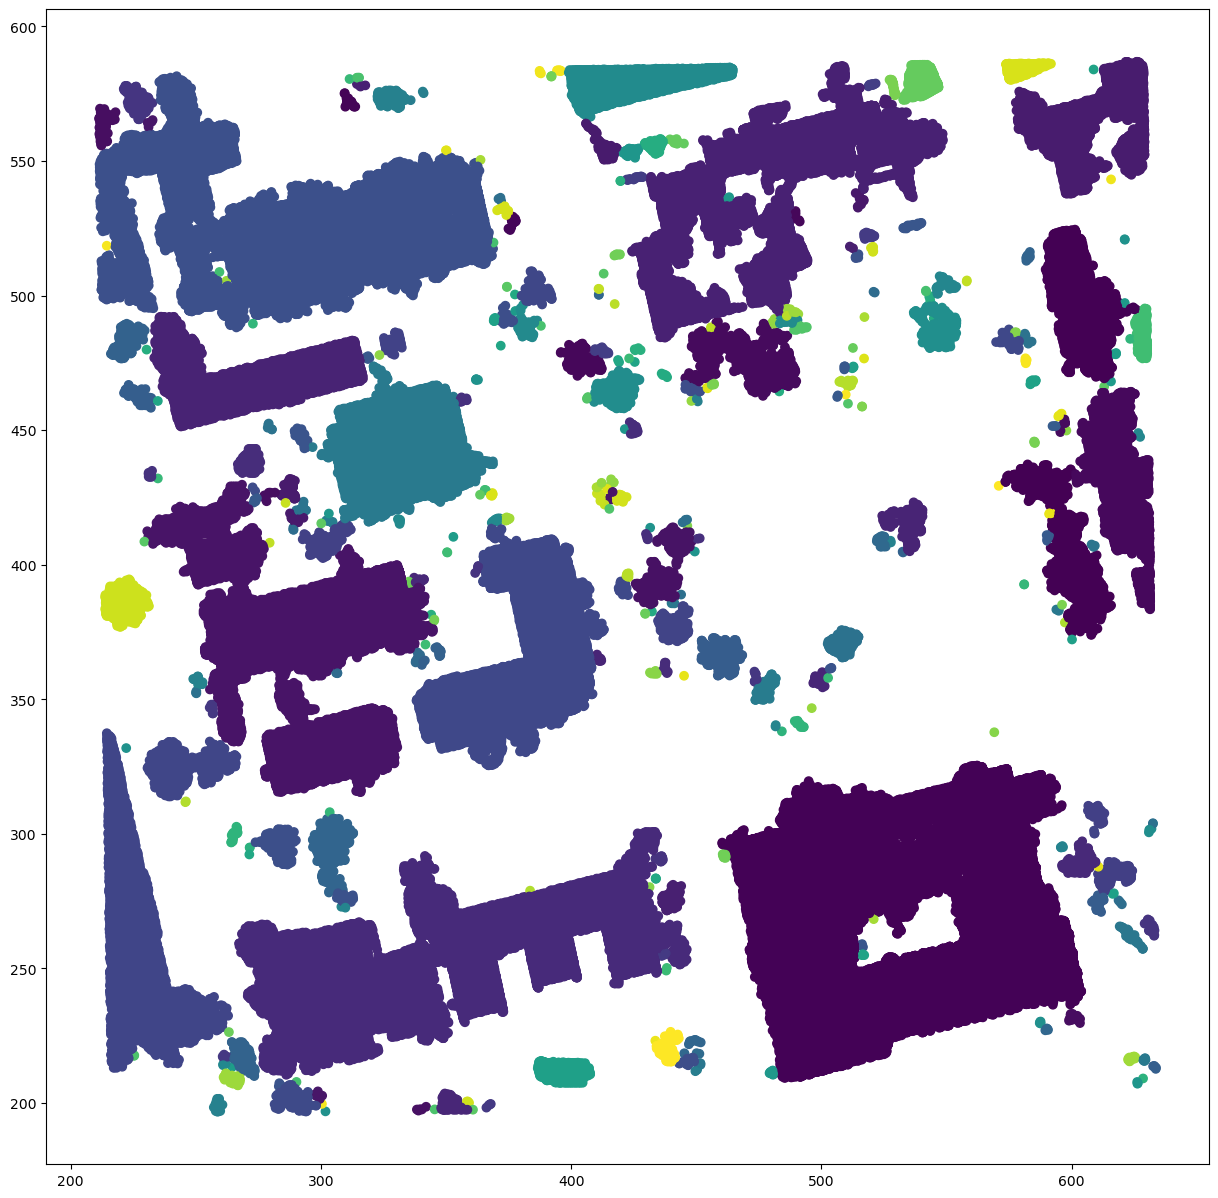

In [27]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
plt.scatter(df['X'], df['Y'], c=df['Cluster'])

In [28]:
########## Remove clusters less than 1000 points


df_a = pd.DataFrame(np.array(df.groupby(["Cluster"]).size().reset_index()[0]), columns=['Num_Points'])
df_a['Cluster'] = df_a.index
df_a

,Num_Points,Cluster
0,4959,0
1,1867,1
2,52826,2
3,21,3
4,16,4
...,...,...
307,1,307
308,5,308
309,1,309
310,127,310


In [29]:
remove = np.array(df_a[df_a['Num_Points'] < 1000].Cluster)
remove 

array([  3,   4,   5,   6,   9,  10,  11,  12,  13,  14,  15,  17,  18,
        19,  20,  21,  22,  23,  25,  26,  27,  28,  31,  32,  33,  34,
        35,  36,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
        49,  50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,
        62,  63,  66,  68,  69,  70,  71,  72,  73,  74,  75,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 150, 151, 152, 153, 154, 155, 156, 157, 158,
       159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171,
       172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184,
       185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 19

In [30]:
for x in remove:
    df = df.drop(df[df.Cluster == x].index)

df

,X,Y,Z,Class,las_X,las_Y,las_Z,HAGL,Cluster
39,400.355011,583.755005,186.294998,8.0,608884.46,4266759.88,23.74,8.84,149
41,401.244995,583.775024,186.384995,8.0,608885.35,4266759.90,23.83,8.93,149
42,402.165009,583.775024,186.415009,8.0,608886.27,4266759.90,23.86,8.96,149
43,403.045013,583.784973,186.445007,8.0,608887.15,4266759.91,23.89,8.99,149
44,403.964996,583.794983,186.464996,8.0,608888.07,4266759.92,23.91,9.01,149
...,...,...,...,...,...,...,...,...,...
973280,614.604980,502.355011,185.714996,8.0,609098.71,4266678.48,23.16,8.26,0
973294,601.434998,508.904999,190.494995,8.0,609085.54,4266685.03,27.94,13.04,0
973309,599.544983,518.934998,186.375000,8.0,609083.65,4266695.06,23.82,8.92,0
973318,599.705017,524.114990,184.994995,8.0,609083.81,4266700.24,22.44,7.54,0


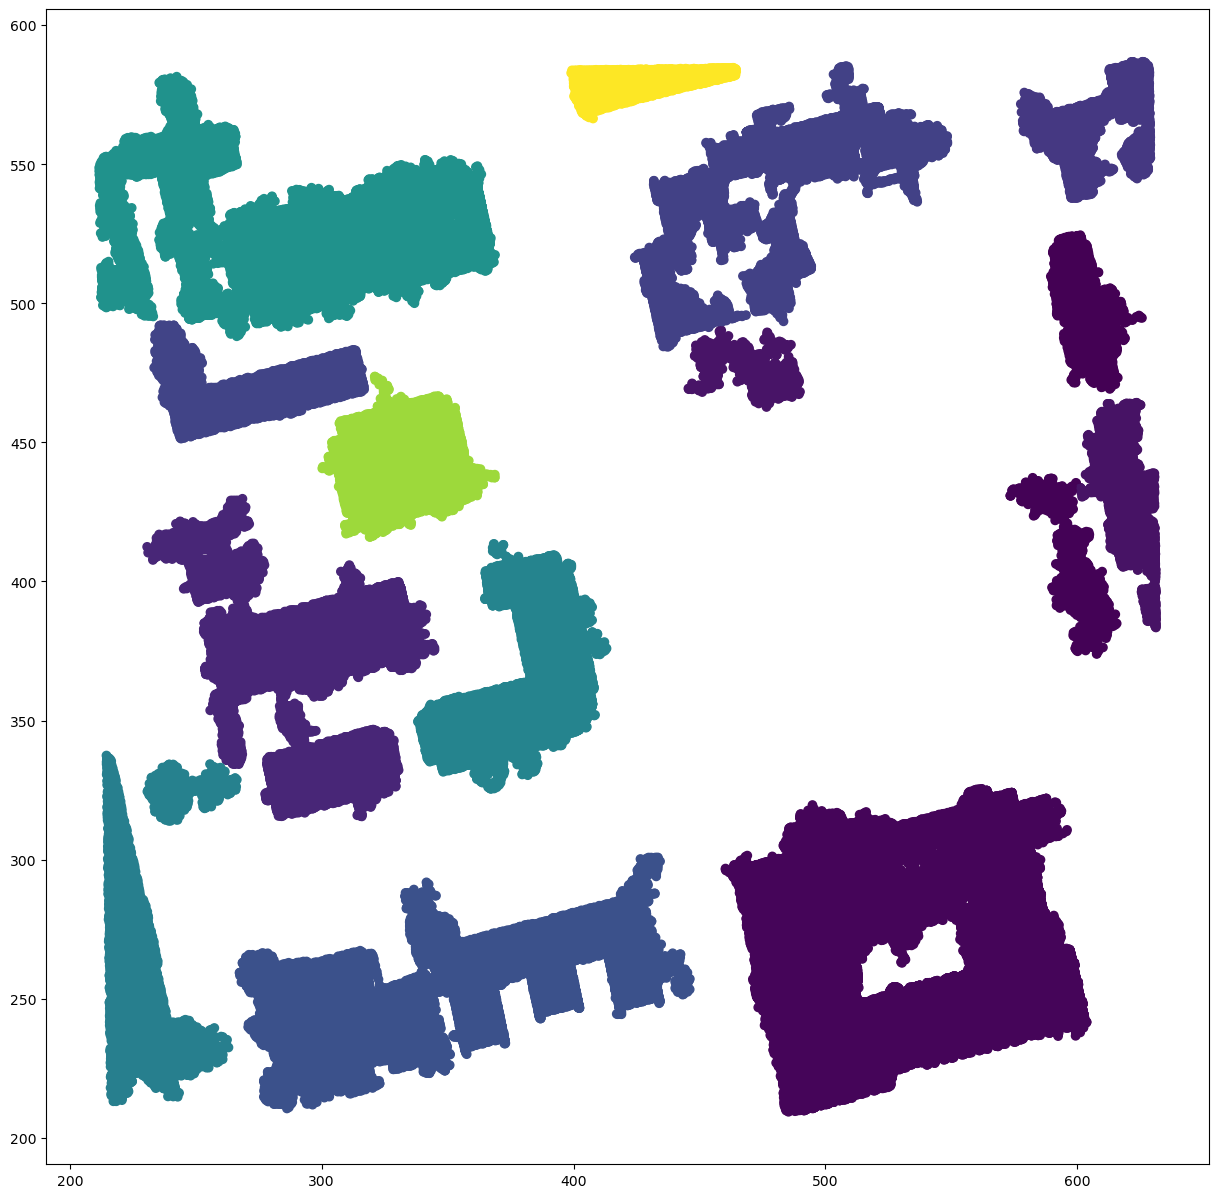

In [31]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
plt.scatter(df['X'], df['Y'], c=df['Cluster'])

In [32]:
df.Cluster.value_counts()

2      52826
76     25803
37     24703
29     17731
16     15873
67     15074
127     9744
64      5912
30      5856
24      5432
7       5382
0       4959
149     3164
1       1867
8       1427
65      1111
Name: Cluster, dtype: int64

<h1> Convex Hull

In [33]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d

In [34]:
b1 = df[df['Cluster'] == 2]
b1

,X,Y,Z,Class,las_X,las_Y,las_Z,HAGL,Cluster
156896,560.934998,324.225006,184.165009,8.0,609045.04,4266500.35,21.61,6.71,2
156897,560.975037,324.214996,186.024994,8.0,609045.08,4266500.34,23.47,8.57,2
156901,559.715027,323.665009,184.014999,8.0,609043.82,4266499.79,21.46,6.56,2
156902,559.695007,323.674988,186.104996,8.0,609043.80,4266499.80,23.55,8.65,2
156903,560.715027,323.665009,183.945007,8.0,609044.82,4266499.79,21.39,6.49,2
...,...,...,...,...,...,...,...,...,...
973078,564.095032,324.785004,186.044998,8.0,609048.20,4266500.91,23.49,8.59,2
973081,516.095032,301.695007,194.434998,8.0,609000.20,4266477.82,31.88,16.98,2
973085,522.794983,309.424988,193.835007,8.0,609006.90,4266485.55,31.28,16.38,2
973089,514.695007,308.095001,194.345001,8.0,608998.80,4266484.22,31.79,16.89,2


In [35]:
b1 = b1[['X','Y']]
b1.describe()

,X,Y
count,52826.000000,52826.000000
mean,531.227905,268.812775
std,37.245747,28.112667
min,460.375000,209.305008
25%,498.747498,245.574997
50%,527.549988,269.029999
75%,564.854980,292.084991
max,603.794983,325.394989


In [36]:
b1 = np.stack([b1['X'], b1['Y']], axis=0).transpose((1, 0))

In [37]:
hull = ConvexHull(b1)
hull.vertices

array([50637, 51161, 34871, 37699, 39155, 39187, 43290, 43327, 43412,
       27482, 27499, 20235,  8345,  3097, 15601, 15685,   322, 33432,
         472, 32977, 28255, 33036, 30439, 34597, 28140], dtype=int32)

In [38]:
hull.simplices

array([[50637, 51161],
       [  322, 15685],
       [34871, 51161],
       [34871, 37699],
       [39155, 37699],
       [ 8345, 20235],
       [33432,   322],
       [43290, 43327],
       [ 3097,  8345],
       [43412, 43327],
       [43412, 27482],
       [27499, 20235],
       [27499, 27482],
       [28140, 50637],
       [28140, 34597],
       [  472, 32977],
       [  472, 33432],
       [39187, 39155],
       [39187, 43290],
       [15601, 15685],
       [15601,  3097],
       [28255, 32977],
       [28255, 33036],
       [30439, 34597],
       [30439, 33036]], dtype=int32)

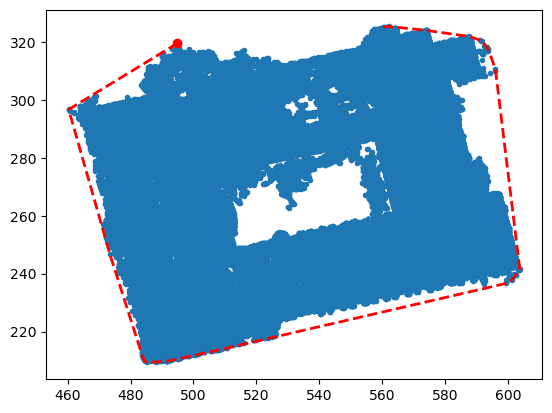

In [39]:
plt.plot(b1[:,0], b1[:,1], '.')
plt.plot(b1[hull.vertices,0], b1[hull.vertices,1], 'r--', lw=2)
plt.plot(b1[hull.vertices[0],0], b1[hull.vertices[0],1], 'ro')
plt.show()

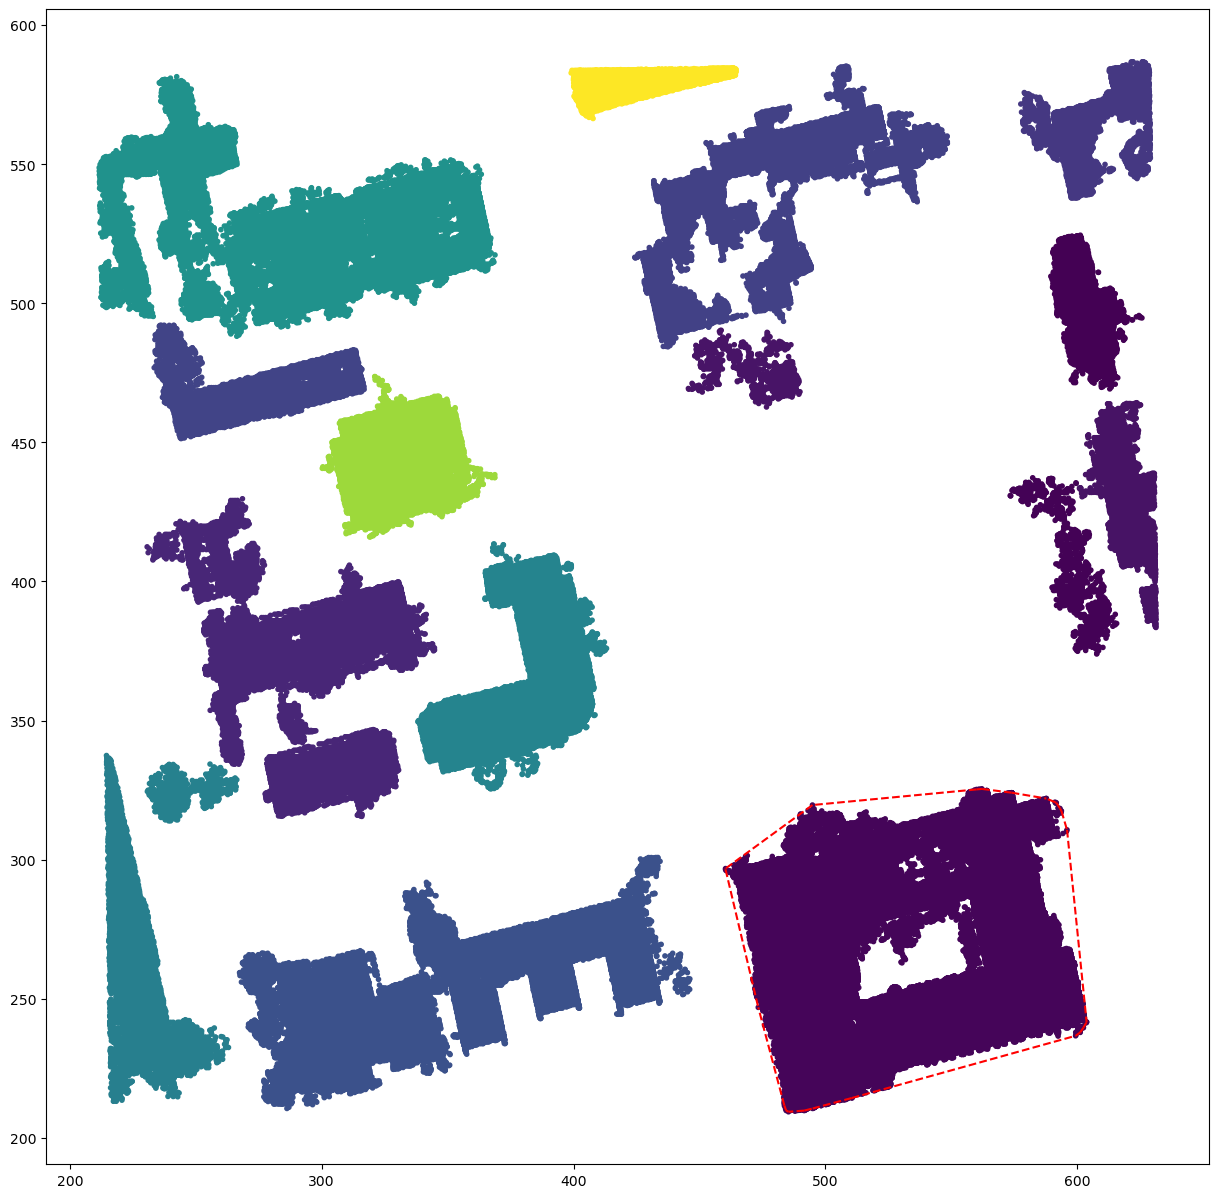

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
plt.scatter(df['X'], df['Y'], c=df['Cluster'], marker=".")
for simplex in hull.simplices:
    plt.plot(b1[simplex, 0], b1[simplex, 1], 'r--')

In [41]:
######## find convex hull centroid     ---> to store as location in db

cx = np.mean(hull.points[hull.vertices,0])
cy = np.mean(hull.points[hull.vertices,1])

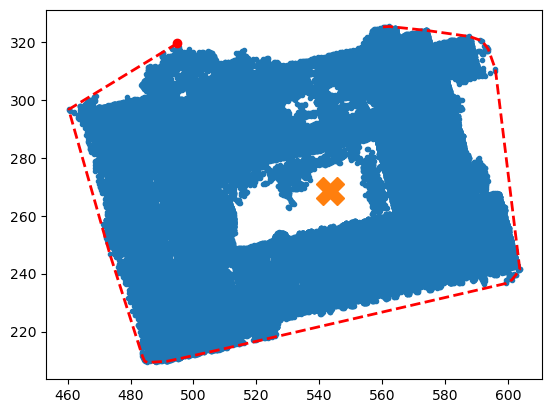

In [42]:
plt.plot(b1[:,0], b1[:,1], '.')
plt.plot(cx, cy, 'X', markersize=20)
plt.plot(b1[hull.vertices,0], b1[hull.vertices,1], 'r--', lw=2)
plt.plot(b1[hull.vertices[0],0], b1[hull.vertices[0],1], 'ro')
plt.show()

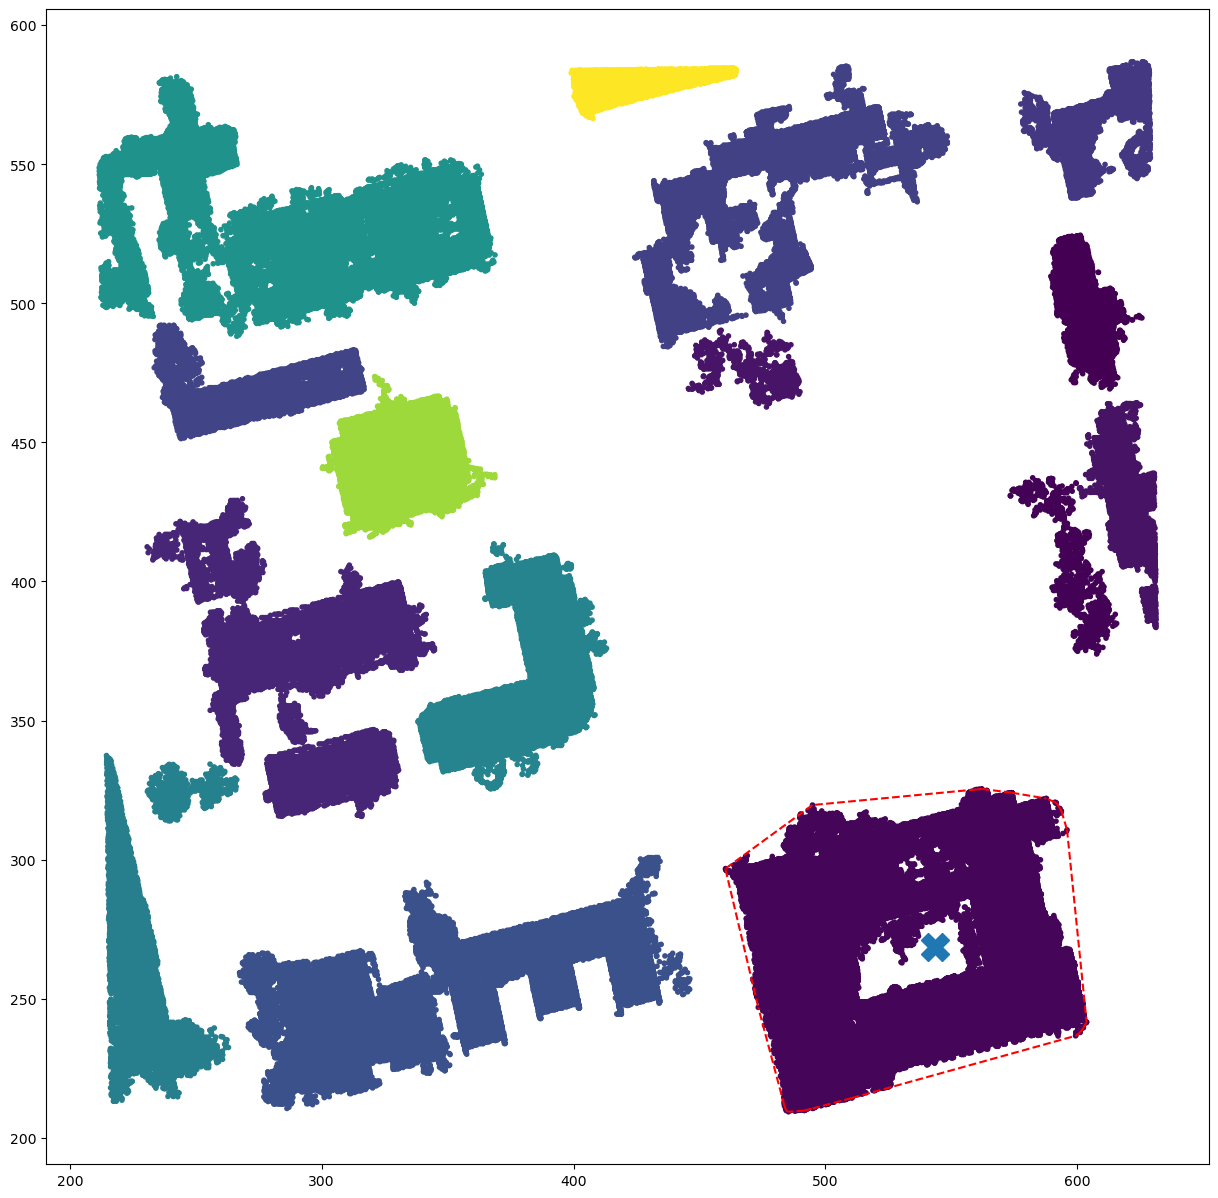

In [43]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 15))
plt.plot(cx, cy, 'X', markersize=20)
plt.scatter(df['X'], df['Y'], c=df['Cluster'], marker=".")
for simplex in hull.simplices:
    plt.plot(b1[simplex, 0], b1[simplex, 1], 'r--')

<h1> Final table using UTM coordinates

In [57]:
buildings_arr = df.Cluster.unique()
buildings_arr

array([149,  29,  24,  76,   0,   7,   1,   2,  30,   8, 127,  16,  67,
        64,  65,  37])

In [91]:
df_sql = pd.DataFrame(columns=['Object','HAGL','Center', 'Vertices'])

for x in buildings_arr:
    b = df[df['Cluster'] == x]
    b = np.stack([b['X'], b['Y']], axis=0).transpose((1, 0))
    hull = ConvexHull(b)
    
    df2 = df[df['Cluster'] == x]
    df2 = df2.reset_index()
    vertices = df2.iloc[hull.vertices]
    v = np.stack([vertices['las_X'], vertices['las_X']], axis=0).transpose((1, 0))
    
    cx = np.mean(df2.iloc[hull.vertices].las_X)
    cy = np.mean(df2.iloc[hull.vertices].las_Y)
    max_height = df2.HAGL.max()
    
    tem_df = pd.DataFrame([['Building(s)',max_height,'[' + str(cx) + ',' + str(cy) +']', ','.join(map(str, v.tolist()))]], columns=['Object','HAGL','Center', 'Vertices'])
    df_sql = pd.concat([df_sql, tem_df],ignore_index=True)


In [92]:
df_sql

,Object,HAGL,Center,Vertices
0,Building(s),10.79,"[608919.2005882352,4266755.403529412]","[608883.17, 608883.17],[608884.3, 608884.3],[6..."
1,Building(s),28.67,"[608980.6411764706,4266721.656470588]","[608908.43, 608908.43],[608919.76, 608919.76],..."
2,Building(s),16.89,"[609098.675,4266741.498461539]","[609063.14, 609063.14],[609061.76, 609061.76],..."
3,Building(s),31.25,"[608767.7555000001,4266707.453]","[608845.96, 608845.96],[608726.5, 608726.5],[6..."
4,Building(s),13.10,"[609082.8911764707,4266682.694117648]","[609109.87, 609109.87],[609085.4, 609085.4],[6..."
5,Building(s),18.87,"[609105.6700000002,4266602.214000001]","[609088.33, 609088.33],[609085.05, 609085.05],..."
6,Building(s),20.21,"[609078.311875,4266583.20375]","[609094.38, 609094.38],[609099.84, 609099.84],..."
7,Building(s),21.11,"[609027.4988000001,4266444.7683999995]","[608979.01, 608979.01],[608944.48, 608944.48],..."
8,Building(s),29.48,"[608750.4379999998,4266649.966]","[608717.56, 608717.56],[608720.84, 608720.84],..."
9,Building(s),16.42,"[608955.1278571428,4266652.859285714]","[608932.72, 608932.72],[608929.73, 608929.73],..."


In [93]:
####### store vertices in database as string to avoid additional tables which might result in slow querying time
#### Also made it easy for other langauge to interpret np array using JSON.parse() for example

','.join(map(str, b1[hull.vertices].tolist()))

'[551.2349853515625, 258.0849914550781],[536.5950317382812, 276.4750061035156],[528.4750366210938, 270.364990234375],[560.9349975585938, 324.2250061035156],[464.7449951171875, 294.9750061035156],[574.8150024414062, 288.885009765625],[519.364990234375, 309.1549987792969],[566.4450073242188, 319.1549987792969],[586.2150268554688, 282.44500732421875],[506.7350158691406, 308.2950134277344],[575.864990234375, 308.81500244140625],[527.405029296875, 224.02500915527344],[541.6749877929688, 308.4150085449219],[547.7449951171875, 310.69500732421875],[514.155029296875, 280.1449890136719],[590.875, 260.6549987792969],[580.6950073242188, 259.5350036621094],[563.2449951171875, 235.66500854492188],[572.0850219726562, 264.2749938964844],[516.35498046875, 285.70501708984375],[535.89501953125, 282.43499755859375],[552.5250244140625, 286.0950012207031],[602.6950073242188, 243.385009765625]'

In [47]:
np.mean(df2.iloc[hull.vertices].las_X)

609027.4988000001

In [48]:
np.mean(df2.iloc[hull.vertices].las_Y)

4266444.7683999995

In [49]:
df.Cluster.unique()

array([149,  29,  24,  76,   0,   7,   1,   2,  30,   8, 127,  16,  67,
        64,  65,  37])

In [50]:
max_height = df2.HAGL.max()
max_height

21.11

<h1> Check our clustering result using long & lat

In [96]:
import utm

In [97]:
utm.to_latlon(609027.4988000001, 4266444.7683999995, 10, northern=True)

(38.539740390475984, -121.74898894191779)

<img src="Davis/Screenshot 2022-11-28 at 8.02.17 PM.png" alt="Goole map result" width="70%" />